In [1]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import ast

### 데이터 불러오기

In [2]:
# txt 파일에서 한 줄씩 읽기
with open(r'/Users/eunsol/Documents/리빙랩 프로젝트/리빙랩_데이터분석/꼬순집 리뷰.txt', 'r', encoding='utf-8') as f:
    txt_꼬순집 = [line.strip() for line in f if line.strip()]

with open(r'/Users/eunsol/Documents/리빙랩 프로젝트/리빙랩_데이터분석/청년참기름 리뷰.txt', 'r', encoding='utf-8') as f:
    txt_청년참기름 = [line.strip() for line in f if line.strip()]

with open(r'/Users/eunsol/Documents/리빙랩 프로젝트/리빙랩_데이터분석/지리산 농부들(생들기름) 리뷰.txt', 'r', encoding='utf-8') as f:
    txt_지리산= [line.strip() for line in f if line.strip()]

In [3]:
# 저장된 리뷰 CSV 불러오기
df1 = pd.read_csv("가게리뷰_수집결과.csv")
df2 = pd.read_csv("방앗간담음_방앗간아이_전라도청년.csv")

df = pd.concat([df1, df2], ignore_index=True)
# 리뷰 문자열을 리스트로 변환
df["리뷰목록"] = df["리뷰목록"].apply(ast.literal_eval)

In [4]:
df.drop(columns=['리뷰수'], inplace=True)

In [5]:
df

,가게이름,리뷰목록
0,시골기름집,"[굿, 친절해요, 감사합니다, 포장이 깔끔해 좋아요, 굿, 좋아요., 그래도 대기업..."
1,대전기름집,"[굿, 엄마단골 기름집입니다\n심부름으로 처음방문했는데 일하시는 젊은 분들이 친절하..."
2,양촌방앗간,[항상 가는곳이에요. 다른분들은 친절하고 좋았는데 오늘 판매하시는분은 일 하기 싫은...
3,제일방앗간,"[깔끔하고 건강한맛 넘~~좋아요, 사장님이 정말 친절하시고 물건에 품질이 좋아요 !..."
4,방앗간_담음,"[재구매참기름 고소하고 넘 맛납니다. 두번째구매해요.앞으로도 쭈욱~~, 포장도 꼼꼼..."
5,방앗간아이,"[재구매참기름, 들기름, 참깨는 항상 이 곳에서 주문해 먹어요. \n포장도 꼼꼼하고..."
6,전라도청년,[파손없이 꼼꼼하게 도착했어요! 처음 맛보는 저운압착 참기름인데 일반 마트에서 파는...


### 파일 병합

In [6]:
# 새로운 행 생성
new_row = pd.DataFrame([
    {"가게이름": "꼬순집", "리뷰목록": txt_꼬순집}, 
    {"가게이름": "지리산농부들", "리뷰목록": txt_지리산}
])

# 기존 df와 병합
df = pd.concat([df, new_row], ignore_index=True)

### 전처리

In [30]:
# 불용어 제거 (원하는 불용어를 추가)
stopwords = ['들기름', '참기름', '꼬순집', '기름', '방앗간', '주문', '구입', '구매', '최고', '진짜', '정말', '계속', '사용', '이번', '여기', '가루', '고춧가루', '고추', 
             '굿', '굿굿', '그냥', '아주', '벌써', '달라', '기분', '처음', '보고', '마늘'
             '예정', '완전', '역시', '일단', '스토어', '제품', '항상', '배송', '청년', '다음', '전혀', '오늘', '위해', '자마자', '의사', 
             '생강', '숟가락', '지리산', '농부', '한번']

In [31]:
okt = Okt()

def extract_nouns(texts):
    all_nouns = []
    for text in texts:
        nouns = okt.nouns(text)
        # 너무 짧은 단어 제거
        nouns = [n for n in nouns if len(n) > 1]

        # 불용어 제거 (원하는 불용어를 추가)
        nouns = [n for n in nouns if n not in stopwords and len(n) > 1]
        
        all_nouns.extend(nouns)
    return all_nouns

In [32]:
def draw_wordcloud(word_freqs, title):
    wc = WordCloud(
        font_path='AppleGothic.ttf',  # 한글폰트 (Windows는 'malgun.ttf' 또는 'NanumGothic.ttf' 사용)
        background_color='white',
        width=800,
        height=600
    )
    mpl.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지    
    plt.figure(figsize=(10, 8))
    # plt.title(title, fontsize=20)
    plt.imshow(wc.generate_from_frequencies(word_freqs))
    plt.axis('off')
    plt.show()

📍 시골기름집 - 리뷰 수: 358


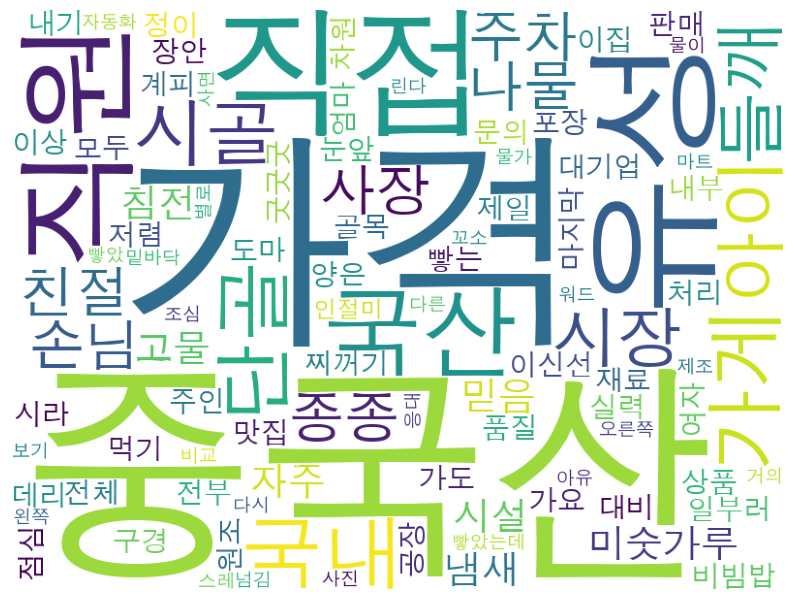

📍 대전기름집 - 리뷰 수: 246


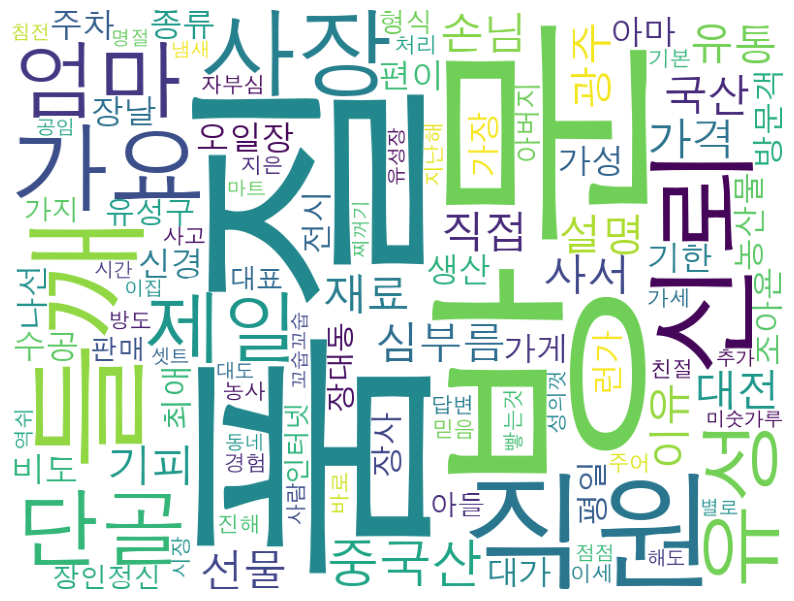

📍 양촌방앗간 - 리뷰 수: 312


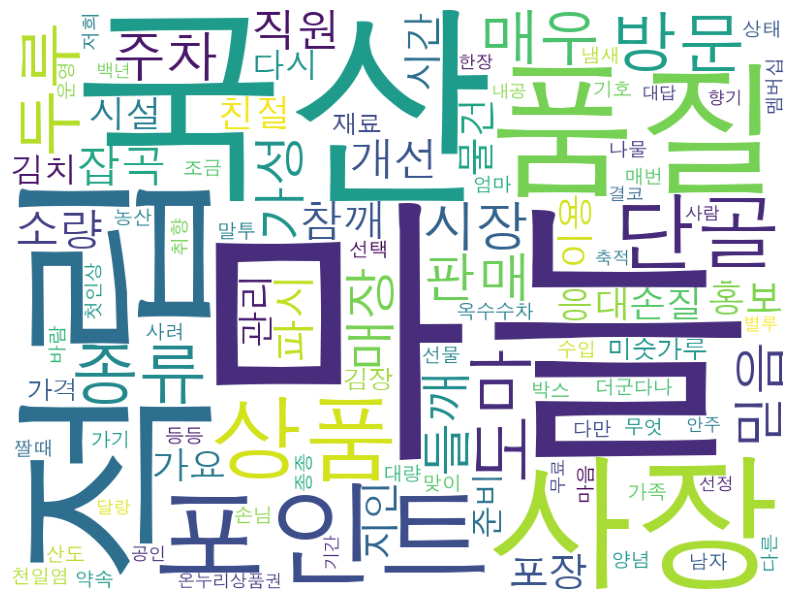

📍 제일방앗간 - 리뷰 수: 195


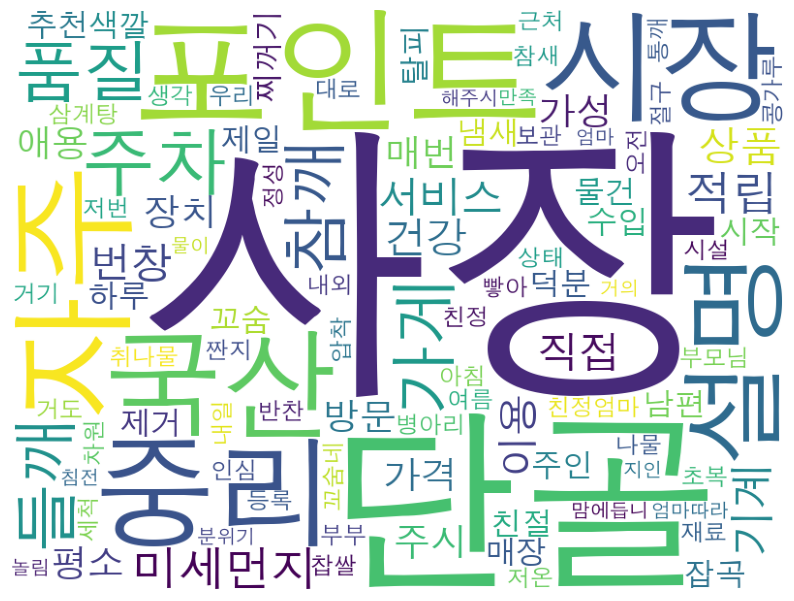

📍 방앗간_담음 - 리뷰 수: 255


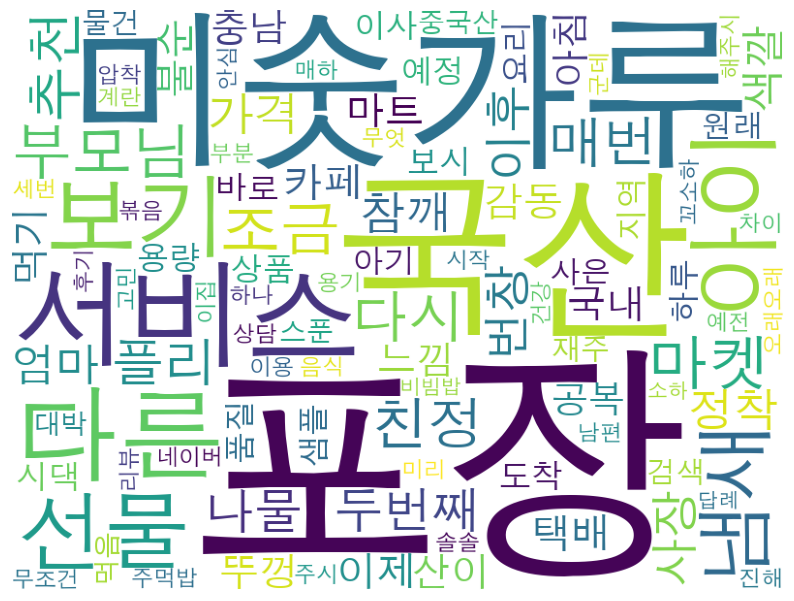

📍 방앗간아이 - 리뷰 수: 3211


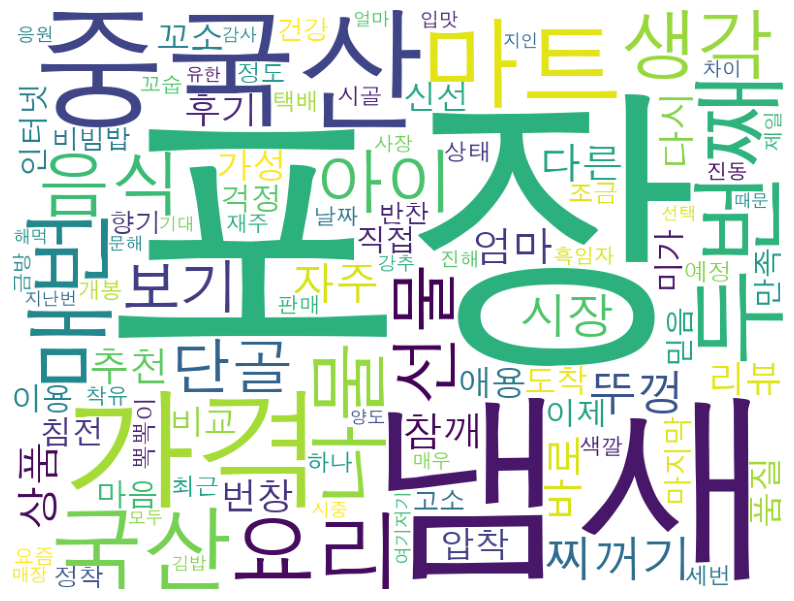

📍 전라도청년 - 리뷰 수: 6794


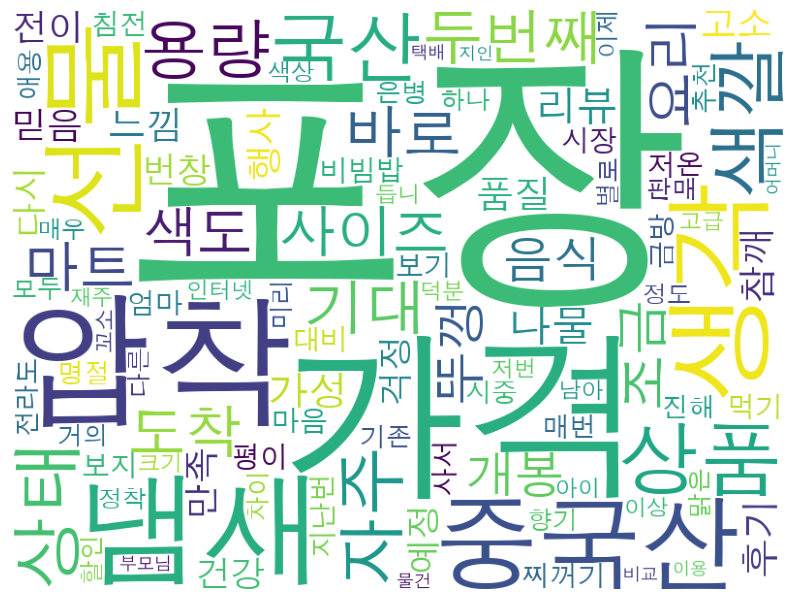

📍 꼬순집 - 리뷰 수: 247


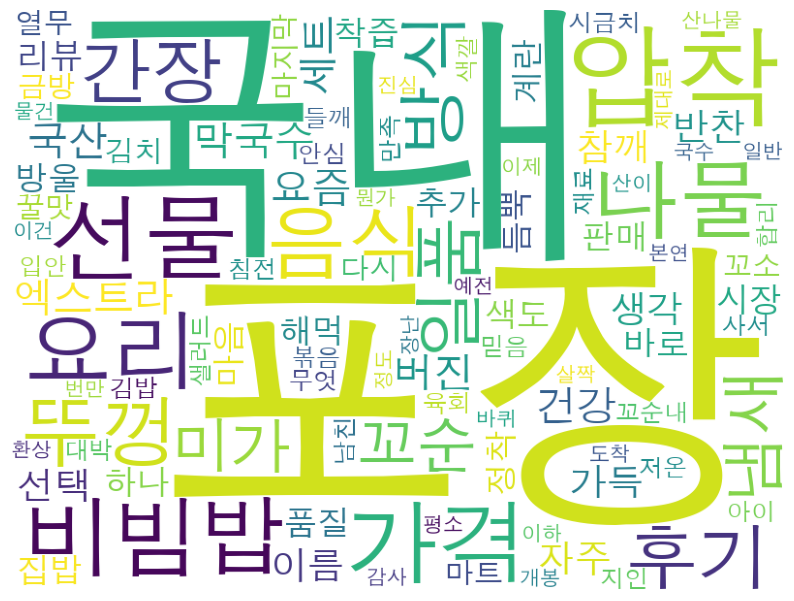

📍 지리산농부들 - 리뷰 수: 522


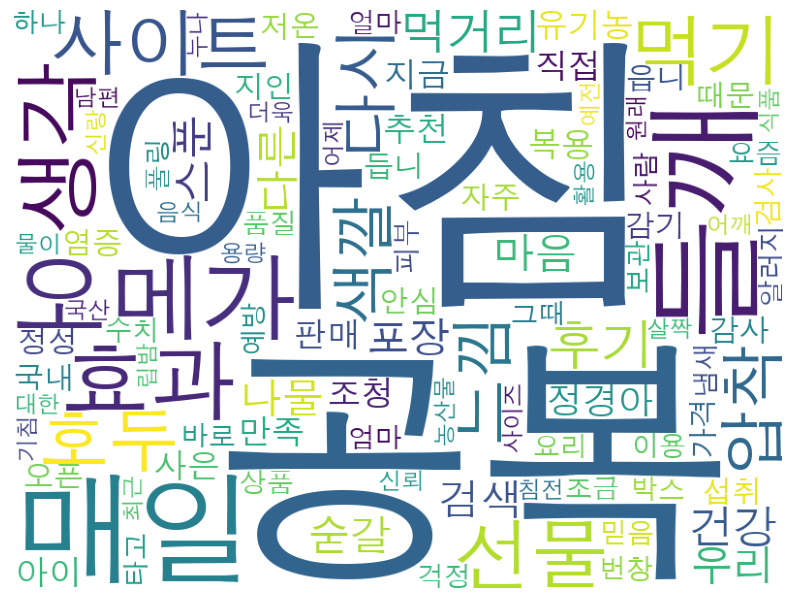

In [33]:
for idx, row in df.iterrows():
    name = row["가게이름"]
    reviews = row["리뷰목록"]

    nouns = extract_nouns(reviews)
    count = Counter(nouns)
    top_words = dict(count.most_common(100))  # 상위 100개만

    print(f"📍 {name} - 리뷰 수: {len(reviews)}")
    draw_wordcloud(top_words, title=name)

### 전체 리뷰 시각화

In [34]:
all_reviews_list = df['리뷰목록'].sum()  # 리스트 합치기
all_reviews_text = ' '.join(all_reviews_list)  # 문자열로 변환

In [35]:
# 명사만 추출
nouns = okt.nouns(all_reviews_text)

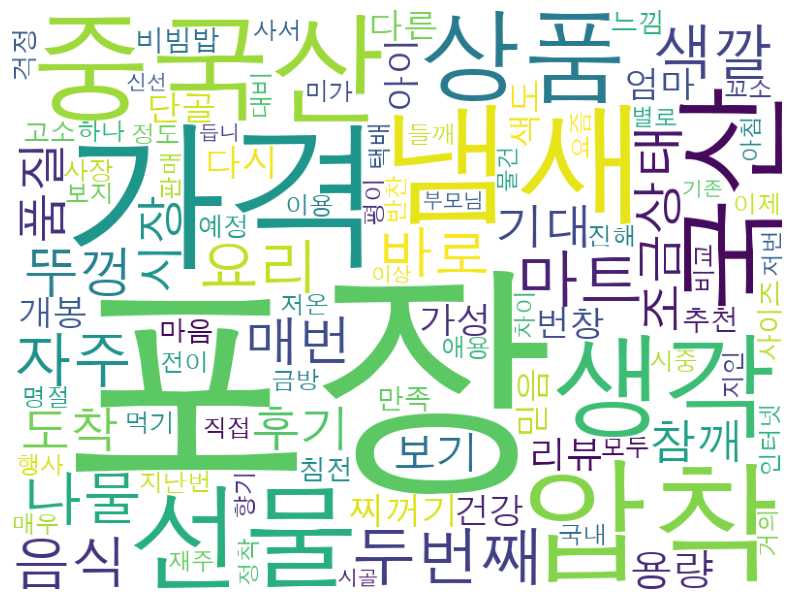

In [36]:
nouns = [n for n in nouns if n not in stopwords and len(n) > 1]

# 상위 100개 단어 선택
count = Counter(nouns)
top_words = dict(count.most_common(100))


# 워드클라우드 생성
wc = WordCloud(font_path='AppleGothic.ttf', background_color='white', width=800, height=600)
plt.figure(figsize=(10, 8))
plt.imshow(wc.generate_from_frequencies(top_words))
plt.axis('off')
plt.show()

### 그래프

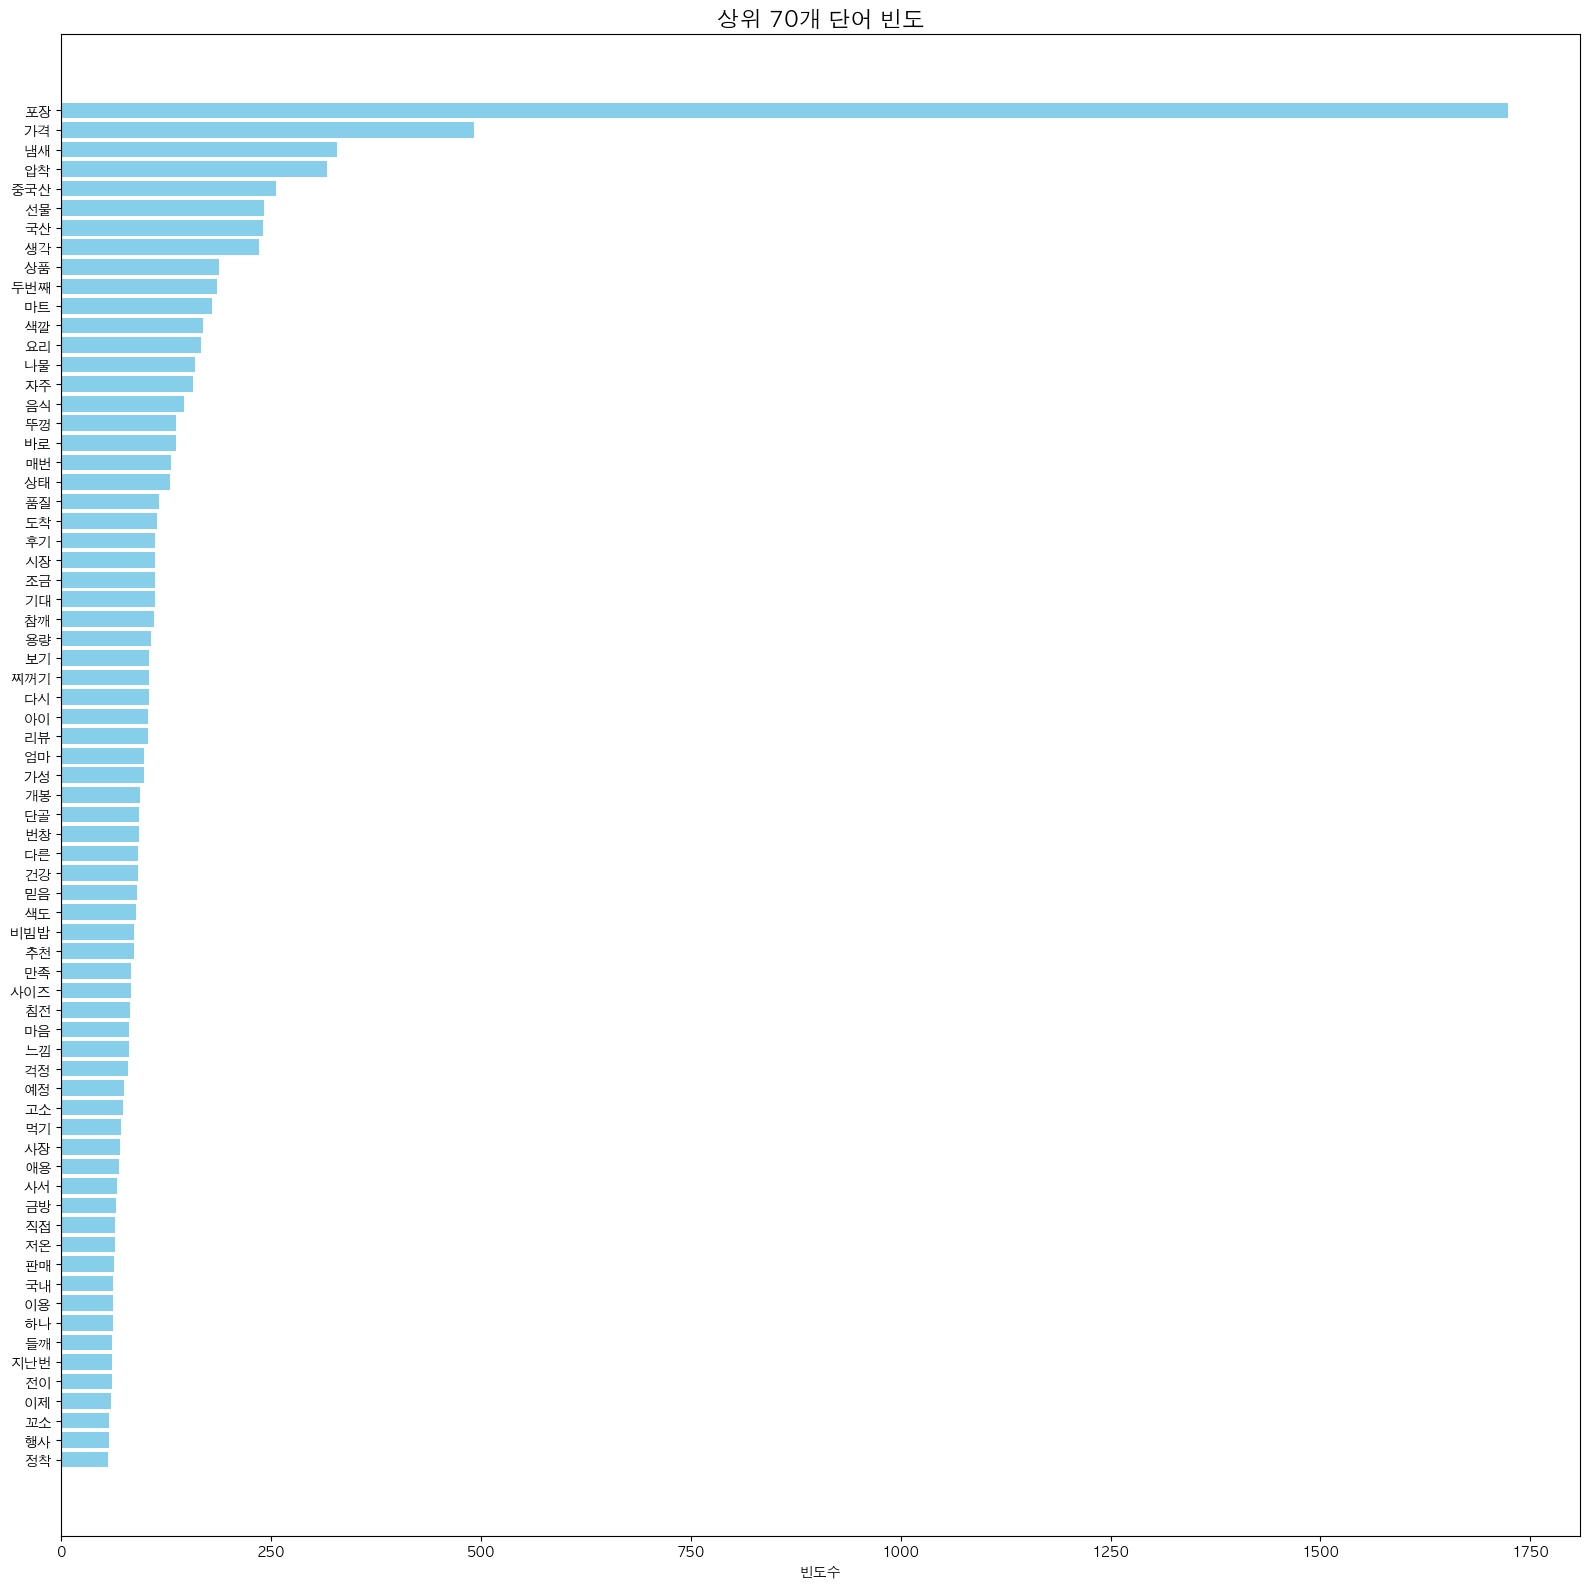

In [37]:
top_num = Counter(top_words).most_common(70)
words = [w for w, c in top_num][::-1]  # 막대그래프 세로 정렬을 위해 역순
counts = [c for w, c in top_num][::-1]

plt.figure(figsize=(16, 16))

plt.barh(words, counts, color='skyblue')
plt.title("상위 70개 단어 빈도", fontsize=16)
plt.xlabel("빈도수")
plt.tight_layout()

plt.show()
